In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [2]:
df=pd.read_csv('/content/top_expensive_leagues.csv')

In [3]:
df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [4]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  700 non-null    float64
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    int64  
 9   Viewership                   700 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
# Correct country mappings
country_corrections = {
    "Premier League": "England",
    "Serie A": "Italy",
    "IPL": "India",
    "La Liga": "Spain",
    "NFL": "USA",
    "NBA": "USA",
    "Bundesliga": "Germany",
    "Ligue 1": "France"
}

In [6]:
# Update the 'Country' column based on the mapping
df['Country'] = df['League Name'].map(country_corrections)

In [7]:
# Correct sport mappings based on league name
sport_corrections = {
    "Premier League": "Football",
    "Serie A": "Football",
    "IPL": "Cricket",
    "La Liga": "Football",
    "NFL": "American Football",
    "NBA": "Basketball",
    "Bundesliga": "Football",
    "Ligue 1": "Football"
}

# Update the 'Sport' column based on the mapping
df['Sport'] = df['League Name'].map(sport_corrections)

In [8]:
#check the null values
df.isnull().sum()

,0
League ID,0
League Name,0
Country,0
Sport,0
Revenue (USD),0
Average Player Salary (USD),0
Top Team,0
Total Teams,0
Founded Year,0
Viewership,0


In [9]:
#duplicated data
df.duplicated().sum()

0

In [10]:
#country column
df['Country'].value_counts()

,count
Country,
USA,166
England,97
Italy,97
Spain,92
Germany,87
India,81
France,80


In [11]:
#country column
df['League Name'].value_counts()

,count
League Name,
Premier League,97
Serie A,97
La Liga,92
Bundesliga,87
NFL,83
NBA,83
IPL,81
Ligue 1,80


In [12]:
#country column
df['Sport'].value_counts()

,count
Sport,
Football,453
American Football,83
Basketball,83
Cricket,81


In [13]:
df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,Italy,Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,India,Cricket,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Football,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [14]:
# Check data types
df.dtypes

,0
League ID,object
League Name,object
Country,object
Sport,object
Revenue (USD),float64
Average Player Salary (USD),float64
Top Team,object
Total Teams,int64
Founded Year,int64
Viewership,float64


#EDA(Explotary Data Analysis):-

In [26]:
#every league name and there top team
# Extracting League Name and Top Team columns
league_top_teams = df[['League Name', 'Top Team']]

# Displaying the result
print(league_top_teams.head(20))

       League Name              Top Team
0   Premier League             Liverpool
1          Serie A           Inter Milan
2              IPL   Chennai Super Kings
3          La Liga       Atletico Madrid
4          Serie A              Juventus
5              NFL  New England Patriots
6          La Liga           Real Madrid
7          La Liga           Real Madrid
8              NBA    Los Angeles Lakers
9       Bundesliga     Borussia Dortmund
10      Bundesliga         Bayern Munich
11         Serie A           Inter Milan
12             IPL   Chennai Super Kings
13             NFL     Green Bay Packers
14             IPL   Chennai Super Kings
15         Ligue 1                  Lyon
16         La Liga       Atletico Madrid
17             NBA            Miami Heat
18      Bundesliga            RB Leipzig
19             IPL        Mumbai Indians


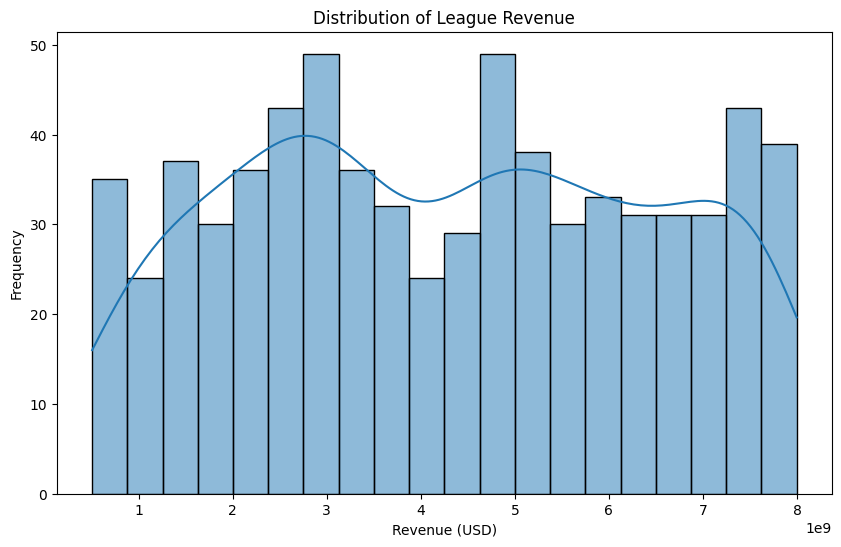

In [15]:
# Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue (USD)'], bins=20, kde=True)
plt.title('Distribution of League Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

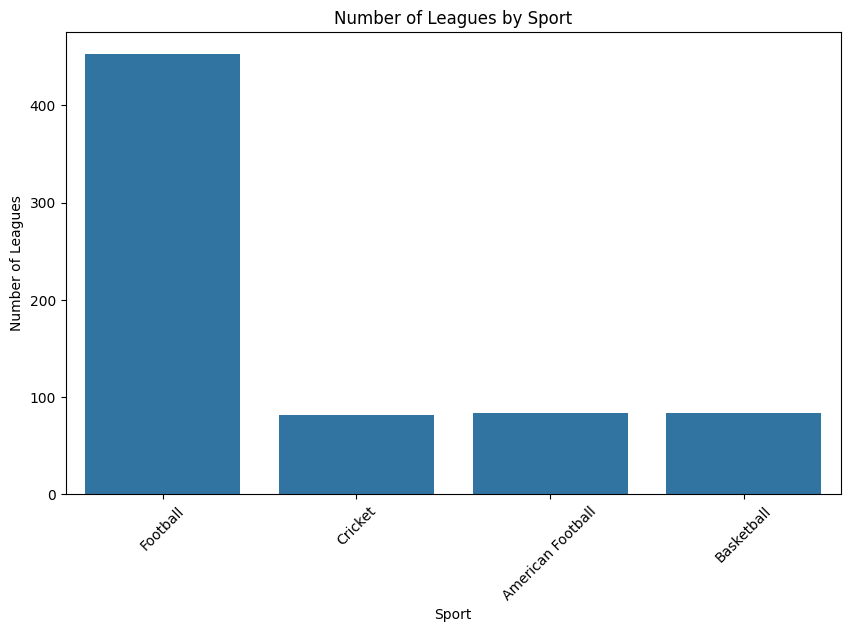

In [17]:
#bar chart on sports column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sport')
plt.title('Number of Leagues by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Leagues')
plt.xticks(rotation=45)
plt.show()

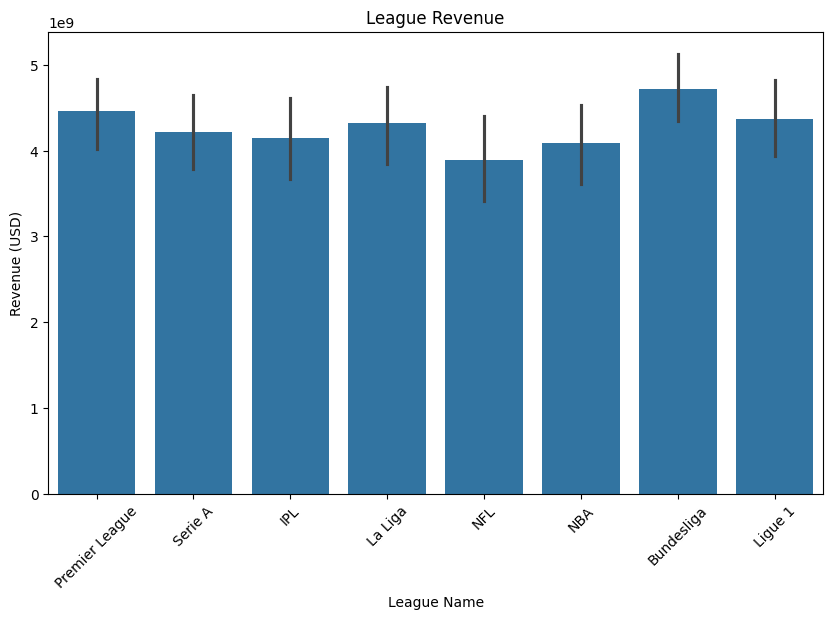

In [19]:
#league name bar as per revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='League Name', y='Revenue (USD)')
plt.title('League Revenue')
plt.xlabel('League Name')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

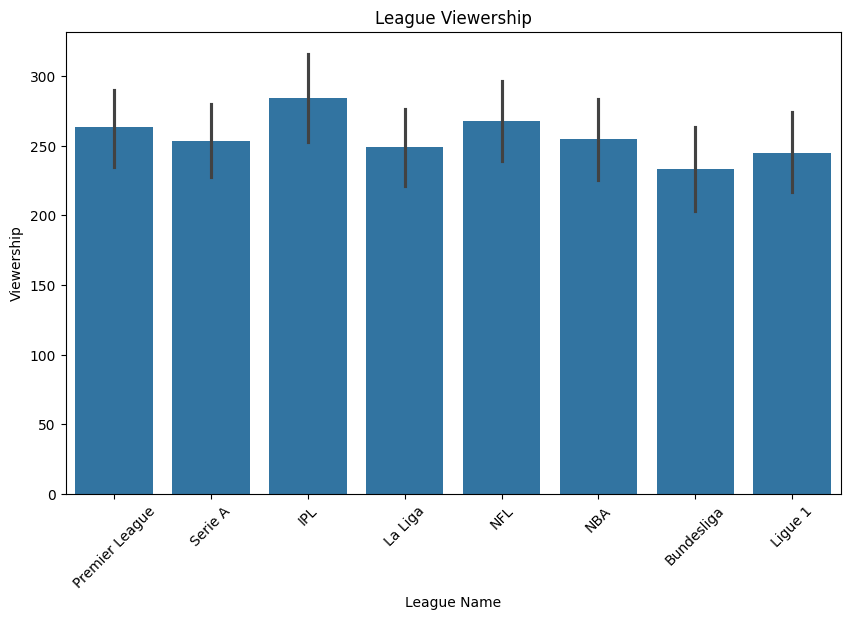

In [22]:
#league name as per viewship
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='League Name', y='Viewership')
plt.title('League Viewership')
plt.xlabel('League Name')
plt.ylabel('Viewership')
plt.xticks(rotation=45)
plt.show()

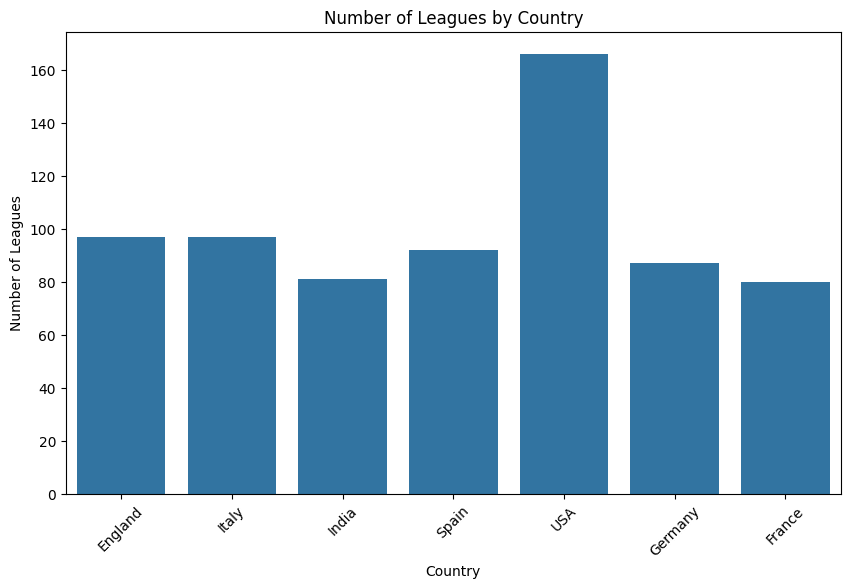

In [27]:
#country with nmber of league
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country')
plt.title('Number of Leagues by Country')
plt.xlabel('Country')
plt.ylabel('Number of Leagues')
plt.xticks(rotation=45)
plt.show()

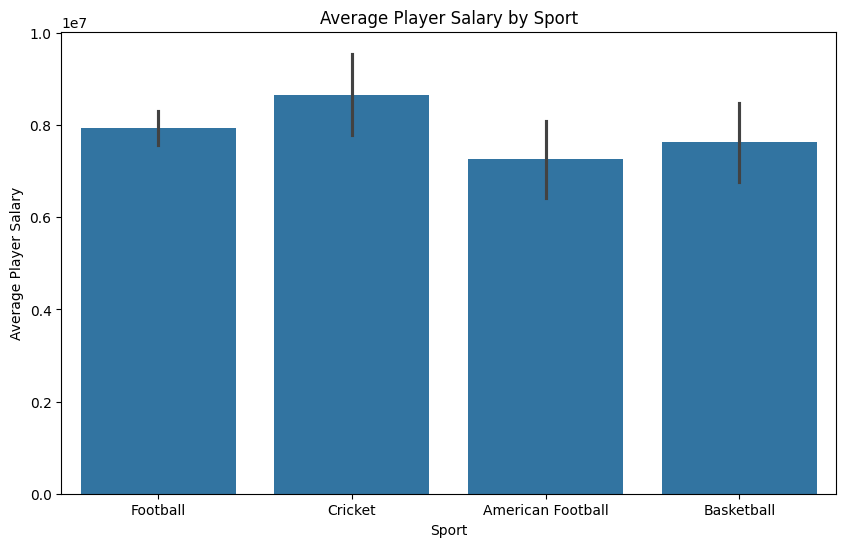

In [29]:
#sports bar as per average player salary
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sport', y='Average Player Salary (USD)')
plt.title('Average Player Salary by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Player Salary')
plt.show()

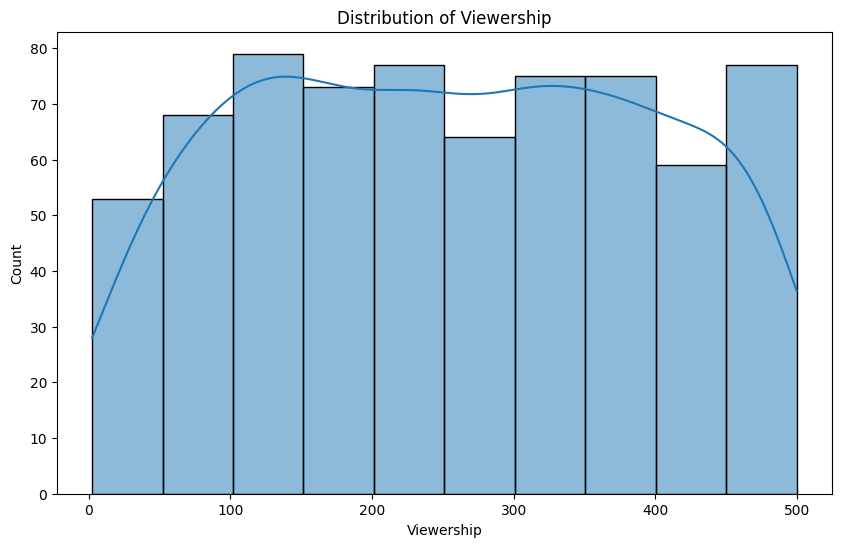

In [30]:
#Histogram: Distribution of Viewership
plt.figure(figsize=(10, 6))
sns.histplot(df['Viewership'], bins=10, kde=True)
plt.title('Distribution of Viewership')
plt.show()

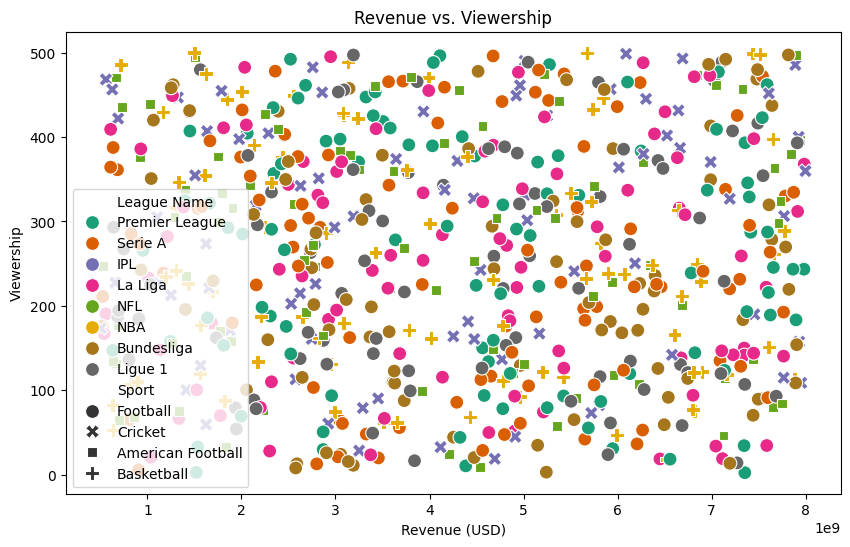

In [33]:
# Scatter Plot: Revenue vs. Viewership
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenue (USD)', y='Viewership', hue='League Name', style='Sport', palette='Dark2', s=100)
plt.title('Revenue vs. Viewership')
plt.xlabel('Revenue (USD)')
plt.ylabel('Viewership')
plt.show()


In [34]:
#save the csv file
df.to_csv('top_expensive_leagues(correct).csv', index=False)

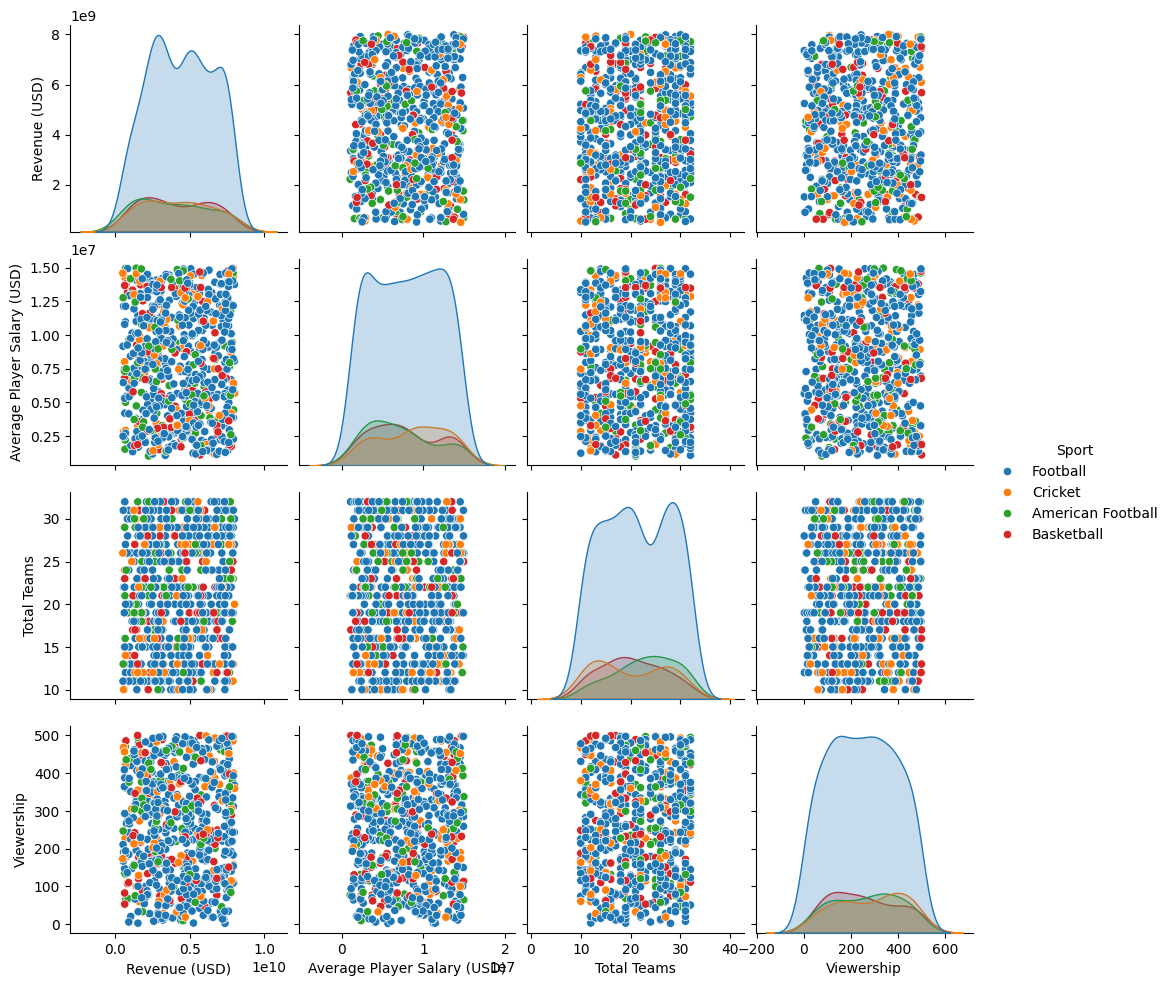

In [43]:
# Pair Plot: Relationships among numerical variables
sns.pairplot(df, vars=['Revenue (USD)', 'Average Player Salary (USD)', 'Total Teams', 'Viewership'], hue='Sport')
plt.show()

In [39]:
# Drop irrelevant columns
df= df.drop(['League ID', 'Top Team'],axis=1)

In [40]:
df.columns

Index(['League Name', 'Country', 'Sport', 'Revenue (USD)',
       'Average Player Salary (USD)', 'Total Teams', 'Founded Year',
       'Viewership'],
      dtype='object')